In [1]:
import numpy as np
pi=np.pi
#
import matplotlib.pyplot as plt

In [2]:
from src import phasr as phr
from src.phasr.utility.math import derivative as deriv
from src.phasr.utility.math import radial_laplace as lap

# SM

In [74]:
# Al27
J_Al27=5/2
Z_Al27=13
A_Al27=27
# L=0
Cs_Mpl_Al27=np.array([27, -11.3343, 0.837814])
Cs_Mmi_Al27=np.array([2*13-27, 0.666696, -0.0858552])
Cs_Phipl_Al27=np.array([-4.98975 , 0.997985])
Cs_Phimi_Al27=np.array([0.303398 , -0.0606814])
# L=2
Cs_Mpl2_Al27=np.array([0, 0.992794, -0.201169])
Cs_Mmi2_Al27=np.array([0, 0.36474, -0.0201471])
Cs_Phipl2_Al27=np.array([-0.0278931, -0.223404])
Cs_Phimi2_Al27=np.array([0.655348, -0.0947049])
# L=4
Cs_Mpl4_Al27=np.array([0, 0, -0.0827811])
Cs_Mmi4_Al27=np.array([0, 0, -0.156105])
Cs_Phipl4_Al27=np.array([0, -0.200917])
Cs_Phimi4_Al27=np.array([0, -0.24046])
#
# Al27 Delta (soon)
norm = 2*np.sqrt(4*pi/(2*J_Al27+1))
# L=1
Cs_Delta_p1_Al27=norm*np.array([0, 0, 0]) # tmp for testing
Cs_Delta_n1_Al27=norm*np.array([0, 0, 0]) # tmp for testing
Cs_Sigmap_p1_Al27=norm*np.array([0.217688, -0.199127, 0.0274599])
Cs_Sigmap_n1_Al27=norm*np.array([0.0255784, -0.00985665, -0.00150251])
Cs_Sigmapp_p1_Al27=norm*np.array([0.153928, -0.0262479, 0.00103769])
Cs_Sigmapp_n1_Al27=norm*np.array([0.0180868, -0.022234, 0.00278141])
# L=3
Cs_Delta_p3_Al27=norm*np.array([0, 0, 0]) # tmp for testing
Cs_Delta_n3_Al27=norm*np.array([0, 0, 0]) # tmp for testing
Cs_Sigmap_p3_Al27=norm*np.array([0, -0.0543796, 0.00651646])
Cs_Sigmap_n3_Al27=norm*np.array([0, 0.000280434, -0.000488419])
Cs_Sigmapp_p3_Al27=norm*np.array([0, -0.0470943, -0.00206298])
Cs_Sigmapp_n3_Al27=norm*np.array([0, 0.000242867, 0.000103865])
# L=5
Cs_Delta_p5_Al27=norm*np.array([0, 0, 0]) # tmp for testing
Cs_Delta_n5_Al27=norm*np.array([0, 0, 0]) # tmp for testing
Cs_Sigmap_p5_Al27=norm*np.array([0, 0, 0.0277341])
Cs_Sigmap_n5_Al27=norm*np.array([0, 0, 0.000128524])
Cs_Sigmapp_p5_Al27=norm*np.array([0, 0, 0.0253177])
Cs_Sigmapp_n5_Al27=norm*np.array([0, 0, 0.000117327])
#

In [75]:
nuc_test = phr.nucleus('test_Al27',Z=13,A=27,Ci_dict={'M00':Cs_Mpl_Al27,'M01':Cs_Mmi_Al27,'Phipp00':Cs_Phipl_Al27,'Phipp01':Cs_Phimi_Al27,'M20':Cs_Mpl2_Al27,'M21':Cs_Mmi2_Al27,'Phipp20':Cs_Phipl2_Al27,'Phipp21':Cs_Phimi2_Al27,'Sigmap1p':Cs_Sigmap_p1_Al27,'Sigmap1n':Cs_Sigmap_n1_Al27})

In [76]:
nuc_test.__dict__

{'nucleus_type': 'oszillator-basis',
 'name': 'test_Al27',
 'Z': 13,
 'A': 27,
 'm': 25133.143901270712,
 'abundance': 1.0,
 'spin': 2.5,
 'parity': 1,
 'Qw': -12.9244,
 'multipoles': ['M00',
  'M01',
  'M0n',
  'M0p',
  'M20',
  'M21',
  'M2n',
  'M2p',
  'Phipp00',
  'Phipp01',
  'Phipp0n',
  'Phipp0p',
  'Phipp20',
  'Phipp21',
  'Phipp2n',
  'Phipp2p',
  'Sigmap10',
  'Sigmap11',
  'Sigmap1n',
  'Sigmap1p'],
 'Ci_M00': array([ 27.      , -11.3343  ,   0.837814]),
 'Ci_M01': array([-1.       ,  0.666696 , -0.0858552]),
 'Ci_Phipp00': array([-4.98975 ,  0.997985]),
 'Ci_Phipp01': array([ 0.303398 , -0.0606814]),
 'Ci_M20': array([ 0.      ,  0.992794, -0.201169]),
 'Ci_M21': array([ 0.       ,  0.36474  , -0.0201471]),
 'Ci_Phipp20': array([-0.0278931, -0.223404 ]),
 'Ci_Phipp21': array([ 0.655348 , -0.0947049]),
 'Ci_Sigmap1p': array([ 0.63007724, -0.57635419,  0.07948007]),
 'Ci_Sigmap1n': array([ 0.07403425, -0.02852914, -0.00434887]),
 'Ci_M0p': array([13.       , -5.333802 ,  0.

In [77]:
rrange=[0.1,9.87,0.0001]
'_r='+str(rrange[0])+'-'+str(rrange[1])+'-'+str(rrange[2])

'_r=0.1-9.87-0.0001'

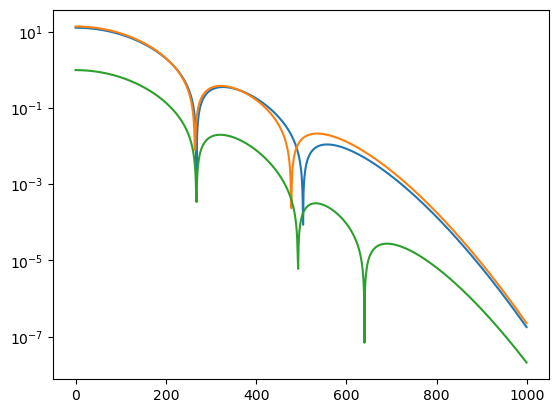

In [78]:
q=np.arange(0,1000,1.)
plt.plot(q,np.abs(nuc_test.FM0p(q)))
plt.plot(q,np.abs(nuc_test.FM0n(q)))
plt.plot(q,np.abs(nuc_test.form_factor(q)))
plt.yscale('log')

In [79]:
nuc_test.charge_density(5)

0.0026424601045817336

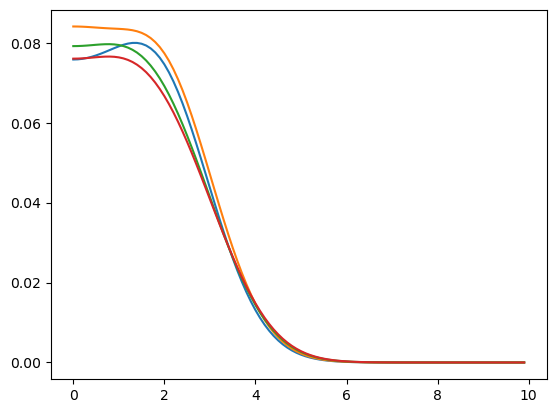

In [80]:
r=np.arange(0,10,0.1)
plt.plot(r,nuc_test.proton_density(r))
plt.plot(r,nuc_test.neutron_density(r))
plt.plot(r,nuc_test.charge_density(r))
plt.plot(r,-nuc_test.weak_density(r))

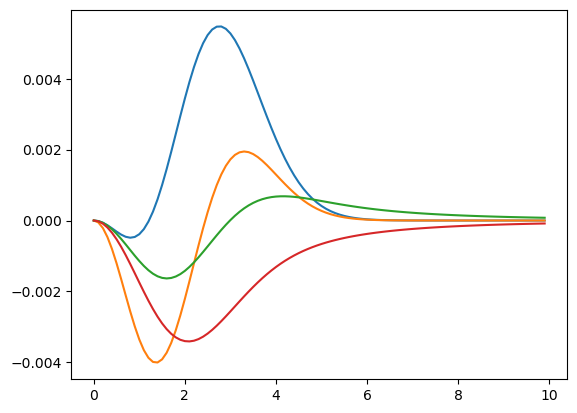

In [81]:
r=np.arange(0,10,0.1)
plt.plot(r,nuc_test.rhoM2p(r))
plt.plot(r,nuc_test.rhoM2n(r))
plt.plot(r,nuc_test.rhoPhipp2p(r))
plt.plot(r,nuc_test.rhoPhipp2n(r))

(0.0, 0.025)

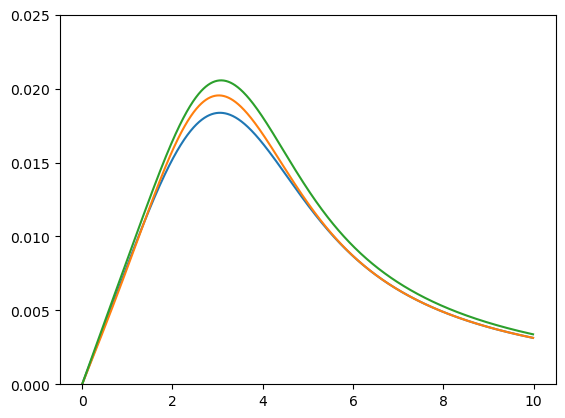

In [82]:
r=np.arange(0,10,1e-2)
plt.plot(r,nuc_test.electric_field(r))
plt.plot(r,nuc_test.ElM0p(r))
plt.plot(r,nuc_test.ElM0n(r))
plt.ylim(0,0.025)

(-0.025, 0.025)

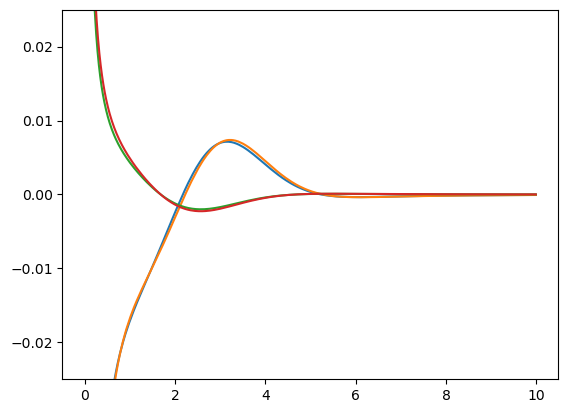

In [83]:
r=np.arange(0,10,1e-2)
plt.plot(r,-lap(nuc_test.ElM0p)(r))
plt.plot(r,-lap(nuc_test.ElM0n)(r))
plt.plot(r,-lap(nuc_test.ElPhipp0p)(r))
plt.plot(r,-lap(nuc_test.ElPhipp0n)(r))
plt.ylim(-0.025,0.025)

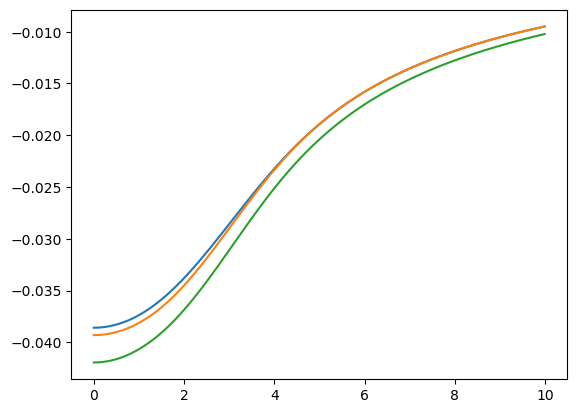

In [84]:
r=np.arange(0,10,1e-2)
plt.plot(r,nuc_test.electric_potential(r))
plt.plot(r,nuc_test.VM0p(r))
plt.plot(r,nuc_test.VM0n(r))
#plt.ylim(0,0.025)

# FB

In [85]:
# Al27 (in fm)
mAl27=phr.masses.mAl27
A_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
R_Al27=7

In [87]:
nuc_test2 = phr.nucleus('test2_Al27',Z=13,A=27,ai=A_Al27,R=7)

In [88]:
nuc_test2.__dict__

{'nucleus_type': 'fourier-bessel',
 'name': 'test2_Al27',
 'Z': 13,
 'A': 27,
 'm': 25133.143901270712,
 'abundance': 1.0,
 'spin': 2.5,
 'parity': 1,
 'Qw': -12.9244,
 'ai': array([ 4.3418e-02,  6.0298e-02,  2.8950e-03, -2.3522e-02, -7.9791e-03,
         2.3010e-03,  1.0794e-03,  1.2574e-04, -1.3021e-04,  5.6563e-05,
        -1.8011e-05,  4.2869e-06]),
 'R': 7,
 'N_a': 12,
 'qi': array([0.44879895, 0.8975979 , 1.34639685, 1.7951958 , 2.24399475,
        2.6927937 , 3.14159265, 3.5903916 , 4.03919055, 4.48798951,
        4.93678846, 5.38558741]),
 'total_charge': 13.001155464519401,
 'total_charge_jacobian': array([ 436.72116384, -109.18029096,   48.52457376,  -27.29507274,
          17.46884655,  -12.13114344,    8.91267681,   -6.82376819,
           5.39161931,   -4.36721164,    3.60926582,   -3.03278586]),
 'charge_radius_sq': 9.212435084895226,
 'charge_radius_sq_jacobian': array([ 645.33495581, -348.95028835,  170.53070835,  -98.96360643,
          64.23726755,  -44.94893078,   33

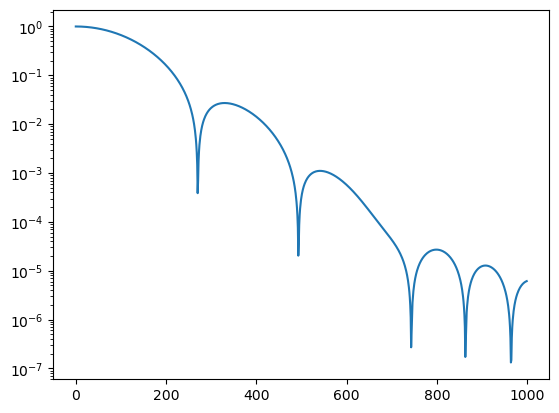

In [95]:
q=np.arange(0,1000,1.)
plt.plot(q,np.abs(nuc_test2.form_factor(q)))
plt.yscale('log')

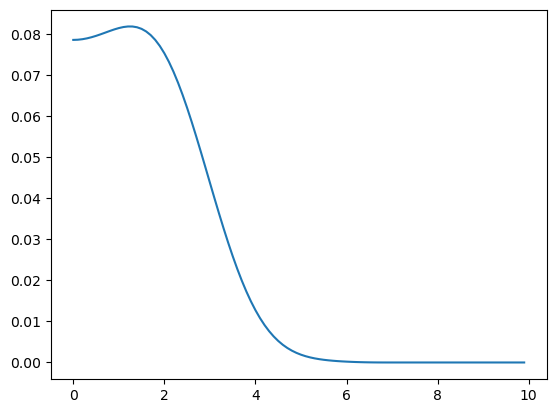

In [96]:
r=np.arange(0,10,0.1)
plt.plot(r,nuc_test2.charge_density(r))

(0.0, 0.025)

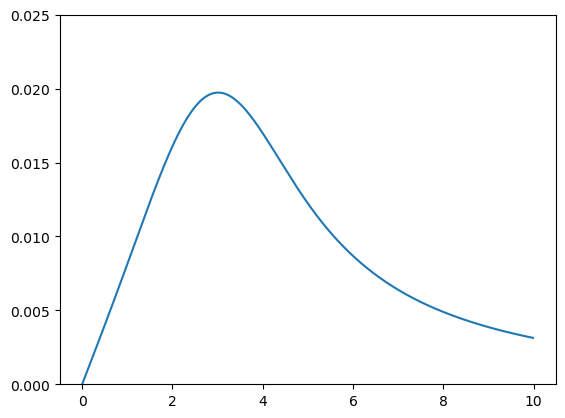

In [97]:
r=np.arange(0,10,1e-2)
plt.plot(r,nuc_test2.electric_field(r))
plt.ylim(0,0.025)

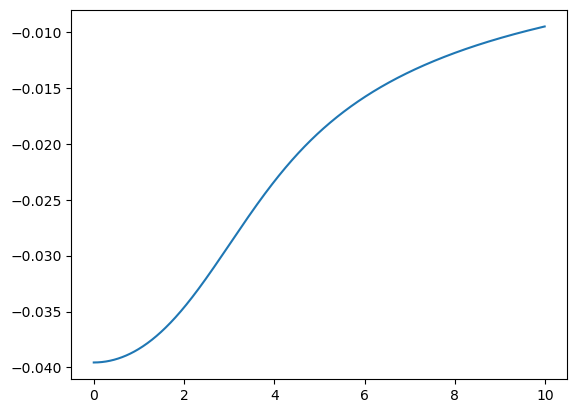

In [98]:
r=np.arange(0,10,1e-2)
plt.plot(r,nuc_test2.electric_potential(r))
#plt.ylim(0,0.025)

# 3pF

In [3]:
nuc_test3 = phr.nucleus('test3_Al27',Z=20,A=40,c=3.6758,z=0.5851,w=-0.1017)

In [4]:
nuc_test3.__dict__

{'nucleus_type': 'fermi3p',
 'name': 'test3_Al27',
 'Z': 20,
 'A': 40,
 'm': 37224.917694198455,
 'abundance': 0.96941,
 'spin': 0.0,
 'parity': 1,
 'Qw': -18.362000000000002,
 'c': 3.6758,
 'z': 0.5851,
 'w': -0.1017,
 'total_charge': 20,
 'nucleus_num': <src.phasr.nuclei.parameterisations.numerical.nucleus_num at 0x2c805277f50>,
 'charge_radius_sq': 12.158685521375894,
 'charge_radius': 3.48693067343988}

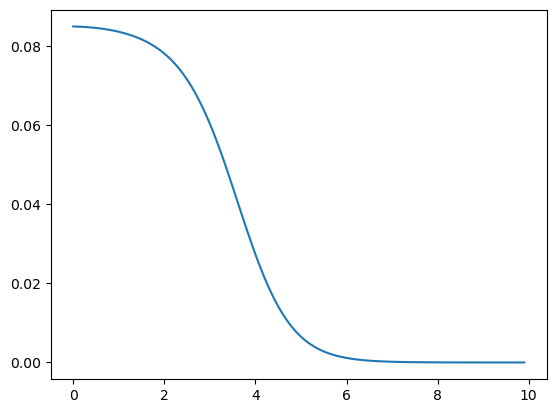

In [5]:
r=np.arange(0,10,0.1)
plt.plot(r,nuc_test3.charge_density(r))

In [6]:
nuc_test3.fill_gaps()

data loaded from  ./tmp/splines/electric_field_test3_Al27fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/splines/electric_potential_test3_Al27fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/splines/form_factor_test3_Al27fermi3p_x=0.0-1000.0-1.0.txt


In [7]:
q=np.arange(1e-3,1000,100.)
np.real(nuc_test3.form_factor(q))

array([ 1.00000000e+00,  5.83582343e-01,  6.95456471e-02, -2.86833625e-02,
       -4.24628661e-04,  2.73392906e-03, -4.68638715e-04, -2.09613727e-04,
        9.76125478e-05,  6.58644976e-06])

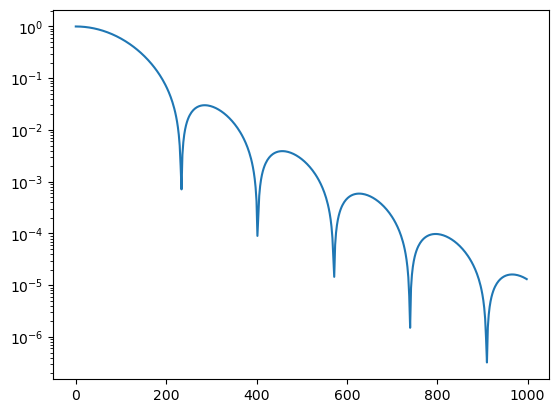

In [8]:
q=np.arange(1e-3,1000,2.)
plt.plot(q,np.abs(nuc_test3.form_factor(q)))
plt.yscale('log')

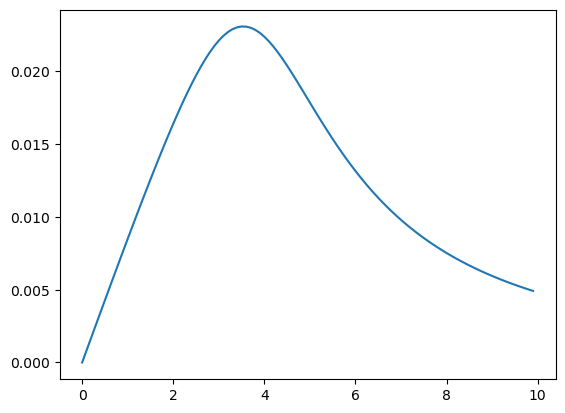

In [9]:
r=np.arange(0,10,0.1)
plt.plot(r,nuc_test3.electric_field(r))

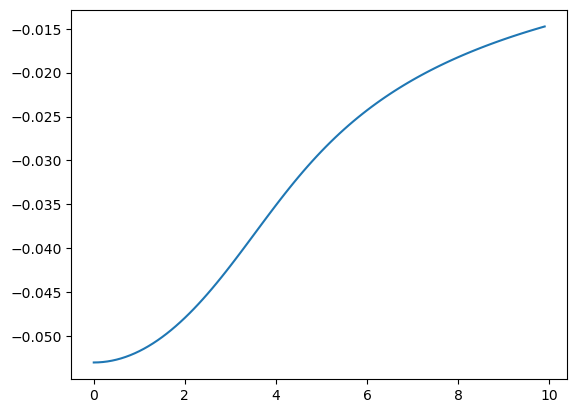

In [10]:
r=np.arange(0,10,0.1)
plt.plot(r,nuc_test3.electric_potential(r))

# 2pF

In [11]:
nuc_test4 = phr.nucleus('test4_Al27',Z=20,A=40,c=3.6758,z=0.5851,w=-0.1017)

In [12]:
nuc_test4.__dict__

{'nucleus_type': 'fermi3p',
 'name': 'test4_Al27',
 'Z': 20,
 'A': 40,
 'm': 37224.917694198455,
 'abundance': 0.96941,
 'spin': 0.0,
 'parity': 1,
 'Qw': -18.362000000000002,
 'c': 3.6758,
 'z': 0.5851,
 'w': -0.1017,
 'total_charge': 20,
 'nucleus_num': <src.phasr.nuclei.parameterisations.numerical.nucleus_num at 0x2c807d1fa50>,
 'charge_radius_sq': 12.158685521375894,
 'charge_radius': 3.48693067343988}

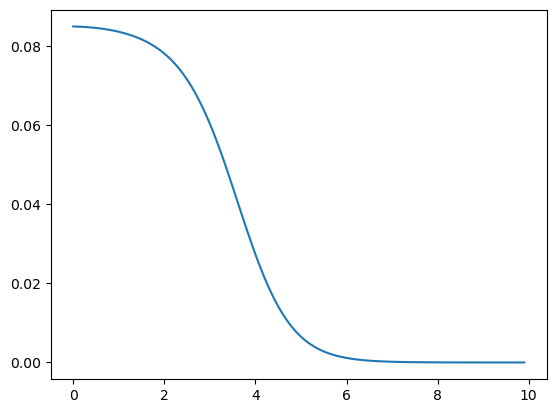

In [13]:
r=np.arange(0,10,0.1)
plt.plot(r,nuc_test4.charge_density(r))

In [14]:
nuc_test4.fill_gaps()

data not found at ./tmp/splines/electric_field_test4_Al27fermi3p_x=0.0-20.0-0.02.txt or forced to recreate.
This may take some time.
data saved in  ./tmp/splines/electric_field_test4_Al27fermi3p_x=0.0-20.0-0.02.txt
data not found at ./tmp/splines/electric_potential_test4_Al27fermi3p_x=0.0-20.0-0.02.txt or forced to recreate.
This may take some time.
data saved in  ./tmp/splines/electric_potential_test4_Al27fermi3p_x=0.0-20.0-0.02.txt
data not found at ./tmp/splines/form_factor_test4_Al27fermi3p_x=0.0-1000.0-1.0.txt or forced to recreate.
This may take some time.
data saved in  ./tmp/splines/form_factor_test4_Al27fermi3p_x=0.0-1000.0-1.0.txt


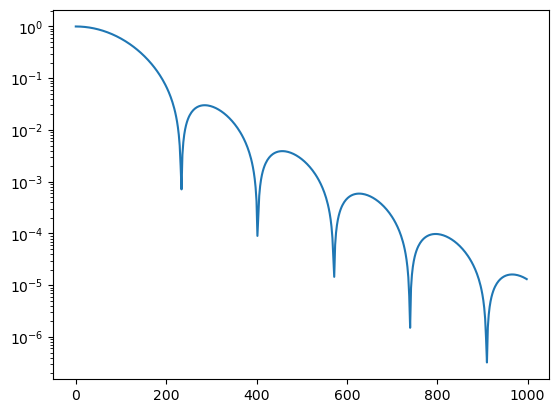

In [16]:
q=np.arange(1e-3,1000,2.)
plt.plot(q,np.abs(nuc_test4.form_factor(q)))
plt.yscale('log')

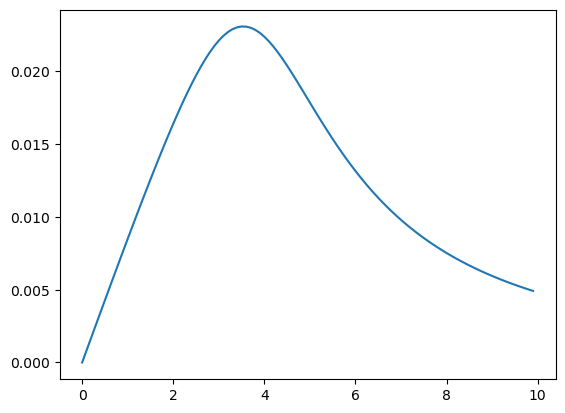

In [17]:
r=np.arange(0,10,0.1)
plt.plot(r,nuc_test4.electric_field(r))

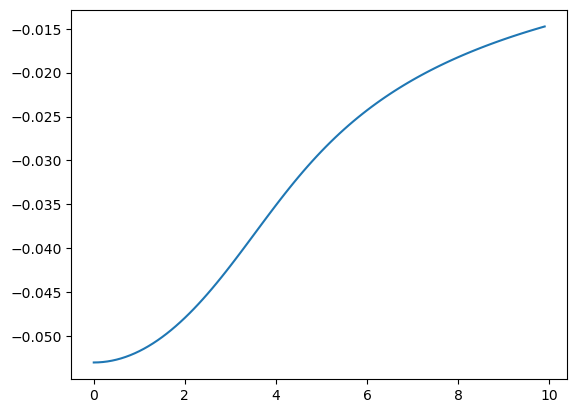

In [18]:
r=np.arange(0,10,0.1)
plt.plot(r,nuc_test4.electric_potential(r))